# 导入相关库

In [9]:
include("..//src//BurgersInviscid1D.jl");
using .BurgersInviscid1D;
using CSV;
using DataFrames;
using Plots;
gr();

# 给定格式

In [10]:
scheme::String = "Upwind_Conservative";

# 数据及图片存储路径

In [11]:
data_path::String = "..//data//$scheme//";
image_path::String = "..//image//$scheme//";
if isdir(data_path) != true
    mkpath(data_path);
end
if isdir(image_path) != true
    mkpath(image_path);
end

# 计算设置

In [12]:
x = Vector(-10: 0.1: 10);
t = Vector(0.: 0.01: 10.);
grid::Grid = Grid(x, t);

f01(x) = x < 0. ? 1. : 0.;
f02(x) = -5. < x < 5. ? -x/10 + 0.5 : (1. - sign(x)) / 2.;
fbc(x) = 1.;

s1::Solver = Solver(grid, f01, fbc; bc_type=1);
s2::Solver = Solver(grid, f02, fbc; bc_type=1);

# 阶跃初始条件

In [13]:
@time res1::Matrix{Float64} = solve(s1; scheme=scheme, use_rk4=true);
@time CSV.write(data_path * "step.csv", DataFrame(res1, :auto));

  2.939704 seconds (17.36 k allocations: 27.453 MiB, 91.00% gc time, 0.02% compilation time)


  0.256959 seconds (905.36 k allocations: 28.643 MiB)


# 斜初始条件

In [14]:
@time res2::Matrix{Float64} = solve(s2; scheme=scheme, use_rk4=true);
@time CSV.write(data_path * "oblique.csv", DataFrame(res2, :auto));

  0.186388 seconds (17.00 k allocations: 27.429 MiB, 36.60% gc time)


  0.129569 seconds (905.36 k allocations: 28.643 MiB)


# 绘制初始条件1

┌ Info: Saved animation to /mnt/c/Users/bcynuaa/Documents/WPS Cloud Files/346102756/博士生阶段资料/研究生课程/计算流体力学/project/HW1/Code/image/Upwind_Conservative/step.gif
└ @ Plots /root/.julia/packages/Plots/aRJ6C/src/animation.jl:149


Plots.AnimatedGif("/mnt/c/Users/bcynuaa/Documents/WPS Cloud Files/346102756/博士生阶段资料/研究生课程/计算流体力学/project/HW1/Code/image/Upwind_Conservative/step.gif")
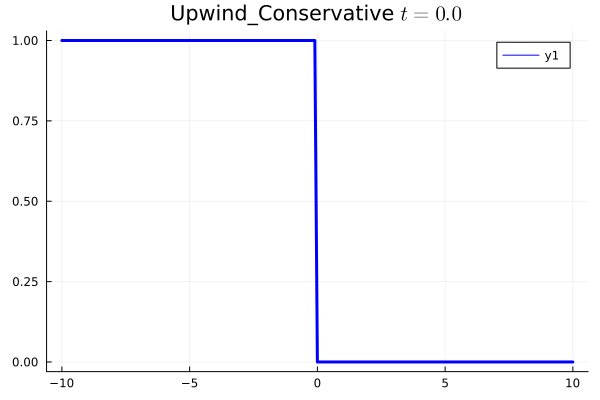

In [15]:
skip = 10;
anim = @animate for k = 1: skip: length(t)
    plot(
        x,
        res1[k, :],
        lw=3,
        color=:blue,
        title="$scheme \$t=$(round(t[k], digits=1))\$"
    )
end
gif(anim, image_path * "step.gif", fps=20)

# 绘制初始条件2

┌ Info: Saved animation to /mnt/c/Users/bcynuaa/Documents/WPS Cloud Files/346102756/博士生阶段资料/研究生课程/计算流体力学/project/HW1/Code/image/Upwind_Conservative/oblique.gif
└ @ Plots /root/.julia/packages/Plots/aRJ6C/src/animation.jl:149


Plots.AnimatedGif("/mnt/c/Users/bcynuaa/Documents/WPS Cloud Files/346102756/博士生阶段资料/研究生课程/计算流体力学/project/HW1/Code/image/Upwind_Conservative/oblique.gif")
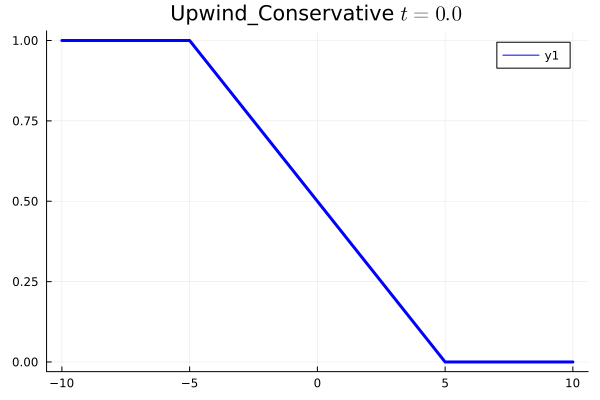

In [16]:
anim = @animate for k = 1: skip: length(t)
    plot(
        x,
        res2[k, :],
        lw=3,
        color=:blue,
        title="$scheme \$t=$(round(t[k], digits=1))\$"
    )
end
gif(anim, image_path * "oblique.gif", fps=20)